<a href="https://colab.research.google.com/github/johyunkang/py_pandas/blob/main/python_ml_perfect_guide_05_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 회귀 (Regression )
### 03 비용 최소화 하기 - 경사 하강법 (Gradient Descent) 소개


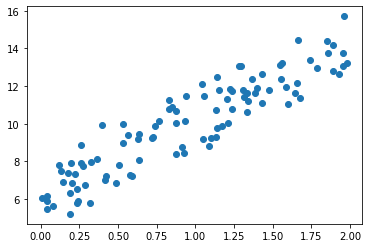

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# y = 4X + 6 을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦
x = 2 * np.random.rand(100, 1)
y = 6 + 4 * x + np.random.randn(100, 1)

# x, y 데이터 세트 산점도로 시각화
plt.scatter(x, y)
# 아래 시각화 데이터는 y = 4x + 6 을 중심으로 무작위로 퍼져 있음

#### 비용함수 정의
비용함수 get_cost()는 실제 y 값과 예측된 y 값을 인자로 받아서 아래 수식으로 계산해서 반환함.


$\dfrac{1}{N} \displaystyle \sum_{i=1}^N(실제값_i - 예측값_i)^2$

In [2]:
# 비용함수 정의
def get_cost(y, y_pred) :
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

In [3]:
# w1과 w0을 업데이트 할 w1_update, w0_update 를 반환
def get_weight_updates(w1, w0, x, y, learning_rate=0.01) :
    N = len(y)

    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape 와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(x, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))

    # w1과 w0을 업데이트할 w1_update 와 w0_update 계산
    w1_update = -(2 / N) * learning_rate * (np.dot(x.T, diff))
    w0_update = -(2 / N) * learning_rate * (np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [4]:
# 입력인자 iters 로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함
def gradient_descent_steps(x, y, iters=10000) :
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
    for ind in range(iters) :
        w1_update, w0_update = get_weight_updates(w1, w0, x, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [5]:
def get_cost(y, y_pred) :
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

w1, w0 = gradient_descent_steps(x, y, iters=1000)
print('w1:{0:.4f} , w0:{1:.4f}'.format(w1[0, 0], w0[0, 0]))

y_pred = w1[0, 0] * x + w0
print('Gradient Descent Total cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.0218 , w0:6.1620
Gradient Descent Total cost:0.9935


실제 선형식인 y = 4X + 6 과 유사하게 w1d은 4.022, w0는 6.162 가 도출되었음. 

예측 오류 비용은 0.9935 

앞에서 구한 y_pred 에 기반해 회귀선을 그려 보겠음

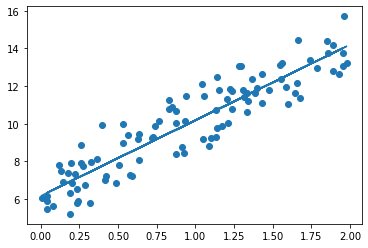

In [6]:
plt.scatter(x, y)
plt.plot(x, y_pred)

#### (미니 배치) 확률적 경사 하강법 (stochastic_gradient_descent_steps())

In [7]:
def stochastic_gradient_descent_stpes(x, y, batch_size=10, iters=1000) :
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    prev_cost = 100000
    itr_index = 0

    for ind in range(iters) :
        np.random.seed(ind)

        # 전체 x, y 데이터에서 랜덤하게 batch_size 만큼 데이터를 추출해 sample_x, sample_y 로 저장
        # permutation(x) 는 x 로 받은 값을 shuffle (섞어서) 반환. 입력변수 자체는 섞지 않음. return 값만 섞음
        stochastic_random_index = np.random.permutation(x.shape[0])
        sample_x = x[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]

        # 랜덤하게 batch_size 만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_x, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0


                                                  

In [8]:
w1, w0 = stochastic_gradient_descent_stpes(x, y, iters=1000)
print('w1:', round(w1[0, 0], 3), ', w0:', round(w0[0, 0], 3))

y_pred = w1[0, 0] * x + w0
print('Stochastic Gradient Descent total cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 , w0: 6.156
Stochastic Gradient Descent total cost:0.9937


#### 사이킷런 LinearRegression을 이용한 보스턴 주택가격 예측

회귀의 성능을 평가하는 지표
- MAE : Mean Absolute Error (MAE)이며 실제 값과 예측값의 차이를 절대값으로 변환해 평균한 것  
$MAE = \dfrac{1}{n} \displaystyle \sum_{i=1}^n|Yi - \hat{Y}i|$

- MSE : Mean Squared Error (MSE)이며 실제 값과 예측값의 차이를 제곱해 평균한 것  
$MSE = \dfrac{1}{n}\displaystyle \sum_{i=1}^n{(Yi - \hat{Y}i)^2}$

- RMSE : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것이 RMSE(Root Mean Squared Error)임  
(아래 수식의 root는 모든 값에 해당)  
$RMSE = \displaystyle \sqrt{\dfrac{1}{n}}\sum_{i=1}^n{(Yi - \hat{Y}i)^2}$

- $R^2$ : 분산 기반으로 예측 성능을 평가합니다. 실제 값으 ㅣ분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높습니다.  
$R^2 = \dfrac{예측값Variance}{실제값Variance}$

**보스턴 주택가격 데이터 피처설명**
- CRIM : 지역별 범죄 발생률
- ZN : 25,000평방피트를 초과하는 거주 지역의 비율
- INDUS : 비상업 지역 넓이 비율
- CHAS : 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX : 일산화 질소 농도
- RM : 거주할 수 있는 방 개수
- AGE : 1940년 이전에 건축된 소유 주택의 비율
- DIS : 5개 주요 고용센터까지의 가중 거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000달러당 재산세율
- PTRATIO : 지역의 교사와 학생 수 비율
- B : 지역의 흑인 거주 비율
- LSTAT : 하위 계층의 비율
- MEDV : 본인 소유의 주택 가격(중앙값)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 DF 변환
df = pd.DataFrame(boston.data, columns = boston.feature_names)
# df.head()

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 컬럼으로 DF에 추가함
df['PRICE'] = boston.target
print('Boston 데이터 세트 크기:', df.shape)
print('info:', df.info())
df.head()

Boston 데이터 세트 크기: (506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
info: None


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


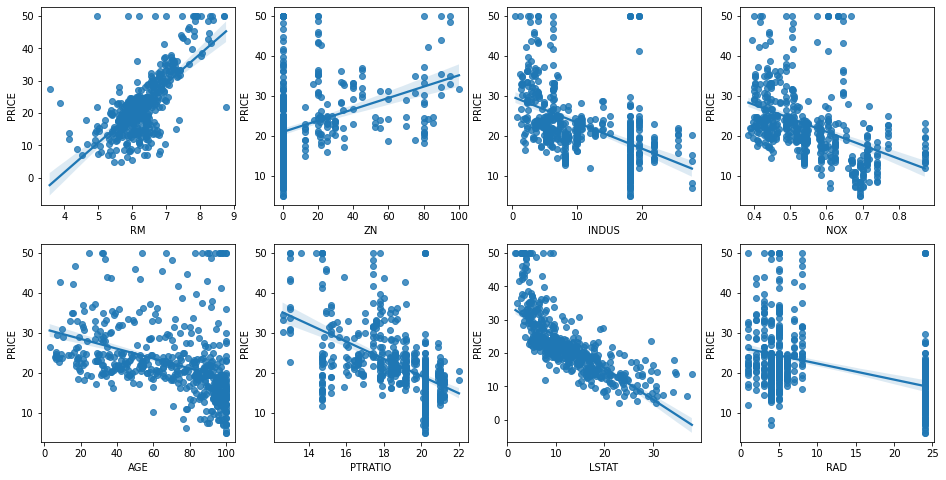

In [10]:
# 각 컬럼이 회귀 결과에 미치는 영향 파악
# ZN, INDUS, NOX, AGE, PTRATIO, LSTAT, RAD 총 8개 컬럼이 증가할 수록 PRICE 값에 어떤 영향을 미치는지 확인
# subplots() 는 여러개의 그래프를 한번에 표현
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs 는 4x2 개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features) :
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

In [11]:
# LinearRegression 클래스를 이용해 보스턴 주택가격 회귀모델 만들기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = df['PRICE']
x_data = df.drop(['PRICE'], axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS(Ordinary Least Squares)로 학습 / 예측 / 평가 수행
lr = LinearRegression()
lr.fit(x_train, y_train)
y_preds = lr.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE:{0:.4f}, RMSE:{1:.4f}'.format(mse, rmse))
print('Variance score:{0:.4f}'.format(r2_score(y_test, y_preds)))
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))
# 회귀 계수값(coef_)은 값만 가지고 있으므로 이를 피처별 회귀 계수 값으로 다시 맵핑 후, 높은 순으로 출력

MSE:17.2969, RMSE:4.1590
Variance score:0.7572
절편 값: 40.995595172164755
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [12]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=x_data.columns)
coeff.sort_values(ascending=False)
# NOX의 -19.8은 마이너스(-) 값이 너무 크다. 최적화 수행 필요

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [13]:
from sklearn.model_selection import cross_val_score

y_target  = df['PRICE']
x_data = df.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring='neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모든 음수
print('5 folds 의 개별 Negative MSE Scores:', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE Scores:', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE:{0:.4f}'.format(avg_rmse))


5 folds 의 개별 Negative MSE Scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE Scores: [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE:5.8287


### 05 다항 회귀와 과(대)적합/과소적합 이해
다항 회귀 이해

회귀에서 선형 회귀/비선형 회귀를 나누는 기준은 **회귀 계수가 선형 / 비선형**인지에 따름.  
(독립변수의 선형 / 비선형 여부와는 무관함)

사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않음.  
대신 다항 회귀 역시 선형 회귀이기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현.


이를 위해 사이킷런은 PolynomialFeatures 클래스를 통해 피처를 Polynomial(다항식) 피처로 변환함.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0, 1], [2, 3]]의 2X2 행렬 생성
x = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처:\n', x)

# degree=2 인  2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(x)
poly_ftr = poly.transform(x)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


단항 계수 피처 [$x_1, x_2$]를 2차 다항 계수 [$1,  x_1,  x_2,  x_1^2,  x_1x_2,  x_2^2$]로 변경하므로   
첫 번째 입력 단항 계수 피처 [$x_1 = 0, x_2 = 1$]은 [$1, x_1=0, x_2=1, x_1^2 = 0, x_1x_2 = 0, x_2^2=0$] 형태인 [1, 0, 1, 0, 0, 1]로 변환됨.

------
3차 다항 회귀의 결정 함수식은 다음과 같음.  
$y = 1 + 2x_1 + 3x_1^2 + 4x_2^3$  로 설정하고  
이를 위한 함수 polynomial_func()를 만듦.

In [15]:
def polynomial_func(x) :
    y = 1 + 2*x[:, 0] + 3*x[:, 0]**2 + 4*x[:, 1]**3
    return y

x = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 features:\n', x)
y = polynomial_func(x)
print('삼차 다항식 결정값:\n', y)

일차 단항식 계수 features:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


PolynomialFeatures(degree=3) 은 단항 계수 피처 [$x_1, x_2$] 를   
3차 다항 계수 [$1, x_1, x_2, x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3$] 과 같이 10개의 다항 계수로 변환함.

In [16]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(x)
print('3차 다항 계수 features:\n', poly_ftr)

# LinearRegression 에 3차 다항식 계수 features와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수:\n', np.round(model.coef_, 2))
print('\nPolyNomial 회귀 shape:', model.coef_.shape)

3차 다항 계수 features:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수:
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]

PolyNomial 회귀 shape: (10,)


#### Pipeline 객체 이용해 한 번에 다항 회귀를 구현

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(x) :
    y = 1 + 2*x[:, 0] + 3*x[:, 0]**2 + 4*x[:, 1]**3
    return y


# pipeline 객체로 Streamline 하게 Polynomial Feature 변환과 LinearRegression 을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
x = np.arange(4).reshape(2, 2)
y = polynomial_func(x)

model = model.fit(x, y)

print('Polynomial 회귀 계수:\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수:
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


##### 다항 회귀를 이용한 과소적합 및 과적합 이해

[언더피팅-오버피팅-참조](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)  
위 참조 링크 소스코드 설명(아래)

소스 코드 간단히 설명하면, 원래 데이터 세트는 피처 X와 target y가 잡음(Noise)이 포함된 다항식의 코사인(Cosine) 그래프 관계를 가지도록 만들어 줍니다.  
그리고 이에 기반해 다항 회귀와 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교하는 예제임.

X: [0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]
Y: [ 1.0819082   0.87027612  1.14386208  0.70322051  0.78494746 -0.25265944
 -0.22066063 -0.26595867 -0.4562644  -0.53001927 -0.86481449 -0.99462675
 -0.87458603 -0.83407054 -0.77090649 -0.83476183 -1.03080067 -1.02544303
 -1.0788268  -1.00713288 -1.03009698 -0.63623922 -0.86230652 -0.75328767
 -0.70023795 -0.41043495 -0.50486767 -0.27907117 -0.25994628 -0.06189804]

Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04320874987232058 입니다.

Degree 15 회귀 계수는 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09

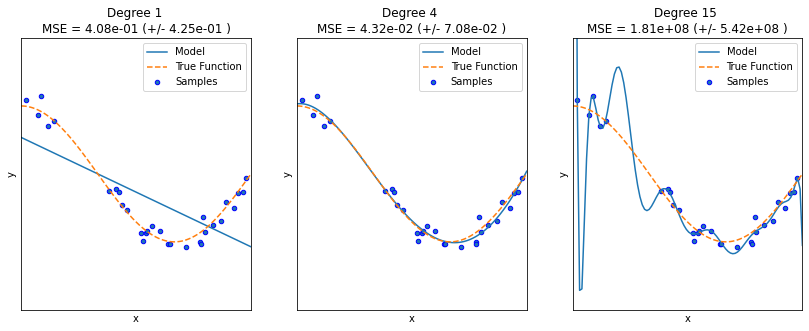

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X 값에 대해 코사인 변환 값을 반환
def true_fun(x) :
    return np.cos(1.5 * np.pi * x)

# x 는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
x = np.sort(np.random.rand(n_samples))
print('X:', x)

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
# np.random.randn(2, 2) : 가우시안 표준 정규분포에서 난수 matrix array 생성
y = true_fun(x) + np.random.randn(n_samples) * 0.1
print('Y:', y)

# print('rand:', np.random.rand(10))
# print('randn:', np.random.randn(10))

plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교함.
for i in range(len(degrees)) :
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree 별로 Polynomial 변환합니다.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    lr = LinearRegression()
    pipeline = Pipeline([('poly', poly),
                         ('lr', lr)])
    pipeline.fit(x.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, x.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=10)

    # pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coeff = pipeline.named_steps['lr'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coeff, 2)))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    x_test = np.linspace(0, 1, 100)

    # 예측값 곡선
    plt.plot(x_test, pipeline.predict(x_test[:, np.newaxis]), label='Model')

    # 실제값 곡선
    plt.plot(x_test, true_fun(x_test), '--', label='True Function')
    plt.scatter(x, y, edgecolor='b', s=20, label='Samples')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc='best')
    plt.title('Degree {} \nMSE = {:.2e} (+/- {:.2e} )'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()
    

**위 코드 실행 결과 그래프 설명**  
![mse-cross-val](https://user-images.githubusercontent.com/291782/140276775-8be10e2e-415b-4cd9-adce-479252d27100.png)

##### 편향-분산 트레이드오프(Bias-Variance Trade off)

![bias-variance](https://user-images.githubusercontent.com/291782/140438171-2c51b1b8-45bb-42a9-80a9-338638ee365e.png)  
[이미지 참조 URL](http://scott.fortmann-roe.com/docs/BiasVariance.html)


- 높은 편향(High Bias) 낮은 분산(Low Variance) : 과소적합 되기 쉬움
- 낮은 편향(Low Bias) 높은 분산(High Variance) : 과대적합 되기 쉬움
- 편향과 분산이 서로 트레이드 오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법이다.


#### 06 규제 선형 모델 - 릿지(Ridge), 라쏘(Lasso), 엘라스틱넷

- L2 규제를 적용한 릿지 회귀
- L1 규제를 적용한 라쏘 회귀

#### 릿지 회귀
RIdge 클래스의 주요 생성 파라미터는 alpha 이며, 이는 릿지 회귀의 L2 규제 계수에 해당함.  
앞 예제의 보스턴 주택 가격을 Ridge 클래스를 이용해 다시 예측하고, 예측 성능을 cross_val_score()로 평가해 보겠음



In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE Scores:', np.round(neg_mse_scores, 3))
print('5 folds 의 개별 RMSE Scores:', np.round(rmse_scores, 3))
print('5 folds 의 평균 RMSE Scores:', np.round(avg_rmse, 3))
# Ridge 의 RMSE 평균이 5.518 인데 앞의 LinearRegression 의 
# RMSE 평균인 5.8287 더 뛰어난게 맞나? 물어봐라 통계과 애들에게
# p.322 중간쯤에도 더 뛰어나다고 나옴
# rmse 는 낮을수록 더 좋은거네....

5 folds 의 개별 Negative MSE Scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds 의 개별 RMSE Scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds 의 평균 RMSE Scores: 5.518


In [20]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alpha list 값을 반복하면서 alpha 에 따른 평균 rmse를 구함
for alpha in alphas :
    ridge = Ridge(alpha = alpha)

    # cross_val_score 를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {} 일때 5 folds의 평균 RMSE : {:.3f}'.format(alpha, avg_rmse))

# 위 실행 결과는 아래와 같고, alpha 가 100일 때 rmse 가 5.330으로 가장 좋다.
# alpha 0 일때 5 folds의 평균 RMSE : 5.829
# alpha 0.1 일때 5 folds의 평균 RMSE : 5.788
# alpha 1 일때 5 folds의 평균 RMSE : 5.653
# alpha 10 일때 5 folds의 평균 RMSE : 5.518
# alpha 100 일때 5 folds의 평균 RMSE : 5.330

alpha 0 일때 5 folds의 평균 RMSE : 5.829
alpha 0.1 일때 5 folds의 평균 RMSE : 5.788
alpha 1 일때 5 folds의 평균 RMSE : 5.653
alpha 10 일때 5 folds의 평균 RMSE : 5.518
alpha 100 일때 5 folds의 평균 RMSE : 5.330


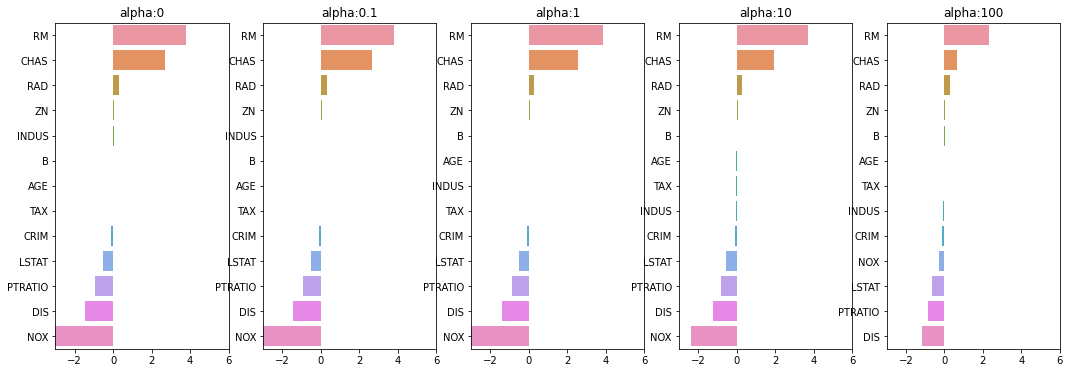

In [21]:
# 각 alpha에 따른 회귀 계수 값을 시각화 하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DF 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_data, y_target)

    # alpha 에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DF의 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=x_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff

    # 막대 그래프의 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show() 호출 및 alpha 에 따른 피처별 회귀 계수를 DF로 표시
plt.show()

In [22]:
# DF에 저장된 alpha 값의 변화에 따른 릿지 회귀 계수 값을 구해보자
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


#### 라쏘 회귀
W의 절대값에 패널티를 부여하는 L1 규제를 선형 회귀에 적용한 것이 라쏘(Lasso) 회귀임.

- L1 규제 : alpha * | W | . 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거가 목표. 적절한 피처만 회귀에 포함시키는 피처 선택의 특성을 가지고 있음.
- L2 규제 : 회귀 계수의 크기를 감소시키는게 목표

In [23]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수들을 DF로 변환
def get_linear_reg_eval(model_name, params=None, x_data_n=None, y_target_n=None,
                        verbose=True, return_coeff=True) :
    coeff_df = pd.DataFrame()
    if verbose : print('##### ', model_name, ' #####')

    for param in params :
        if model_name == 'Ridge' : model=Ridge(alpha = param)
        elif model_name == 'Lasso' : model = Lasso(alpha = param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha = param, l1_ratio=0.7)

        neg_mse_scores = cross_val_score(model, x_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {} 일 때 5 폴드 세트의 평균 RMSE:{:.4f}'.format(param, avg_rmse))
        
        # cross_val_scores는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(x_data_n, y_target_n)

        if return_coeff :
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DF의 컬럼으로 추가
            coeff = pd.Series(data=model.coef_, index=x_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname] = coeff
        
    return coeff_df
# end of get_linear_reg_eval



In [24]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, x_data_n=x_data, y_target_n=y_target)

#####  Lasso  #####
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE:5.6123
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE:5.6151
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE:5.6691
alpha 1 일 때 5 폴드 세트의 평균 RMSE:5.7760
alpha 3 일 때 5 폴드 세트의 평균 RMSE:6.1888


In [25]:
# 반환된 coeff_lasso_df 를 첫번째 컬럼순으로 내림차순 정렬해 회귀 계수 DF 출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)
# 출력된 DF를 보면 alpha 크기가 증가함에 따라 일부 피처의 회귀 계수는 아예 0으로 바뀌고 있음
# NOX 속성은 alpha 가 0.07일때 부터 회귀 계수가 0이며, alpha 를 증가시키면서 INDUS, CHAS와 같은 속성의 회귀 계수가 0으로 바뀜

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


#### 엘라스틱 회귀
엘라스틱(Elastic Net) 회귀는 L2 규제와 L1 규제를 결합한 회귀임  

따라서 엘라스틱 회귀 비용함수의 목표는 RSS(W) + alpha2 * | W | + alpha1 * | W | 식을 최소화하는 W를 찾는것


엘라스틱 넷의 단점은 L1과 L2 규제가 결합된 규제로 인해 수행시간이 상대적으로 오래 걸린다는 것

In [26]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]

coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, x_data_n=x_data, y_target_n=y_target)
# alpha 가 0.5 일때 RMSE 가 5.4667 로 가장 좋은 예측 성능을 보이고 있음

#####  ElasticNet  #####
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE:5.5417
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE:5.5259
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE:5.4667
alpha 1 일 때 5 폴드 세트의 평균 RMSE:5.5969
alpha 3 일 때 5 폴드 세트의 평균 RMSE:6.0681


In [27]:
# 반환된  coeff_elastic_df를 첫번째 컬럼 순으로 내림차순 정렬해 회귀계수 DF 출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)
# alpha 값에 따른 피처들의 회귀 계수들 값이 라쏘 보다는 상대적으로 0이 되는 값이 적음을 알수 있음

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


#### 선형 회귀 모델을 위한 데이터 변환

일반적으로 피처 데이터 세트와 타겟 데이터 세트에 스케일링 / 정규화 작업을 수행하는 방법이 조금 다름.  
피처 데이터 세트에 적용하는 변환 작업은 다음과 같은 방법이 있을 수 있음  

1. StandardScaler 클래스를 이용해 평균이 0, 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환하거나 MinMaxScaler 클래스를 이용해 최솟값이 0이고 최대값이 1인 값으로 정규화를 수행.
2. 스케일링 / 정규화를 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환하는 방법. 보통 1번 방법을 통해 예측 성능에 향상이 없을 경우 이와 같은 방법을 적용함.
3. 원래 값에 log 함수를 적용하면 보다 정규 분포에 가까운 형태로 값이 분포됨. 이러한 변환을 로그 변환(Log Transformation)이라고 부름. 로그 변환은 매우 유용한 변환이며, 실제로 선형 회귀에서는 앞에서 소개한 1, 2 번 방법보다 로그 변환이 훨씬 많이 사용되는 변환 방법. 왜냐하면 1번 방법의 경우 예측 성능 향상을 크게 기대하기 어려운 경우가 많으며, 2번 방법의 경우 피처의 개수가 매우 많을 경우에는 다항 변환으로 생성되는 피처의 개수가 기하급수로 늘어나서 과적합의 이슈가 발생할 수 있기 때문임.


타겟값의 경우는 일반적으로 로그 변환을 적용함. 결정 값을 정규 분포나 다른 정규 값으로 변화하면 변환된 값을 다시 원본 타겟값으로 원복하기 어려울 수 있음.

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다항식 특성을 추가할 때 적용. p_degree는 2 이상 ㅂ여하지 않음.
def get_scaled_data(method='None', p_degree=None, input_data=None) :
    if method == 'Standard' :
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax' :
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log' :
        scaled_data = np.log1p(input_data)
    else :
        scaled_data = input_data

    if p_degree != None :
        scaled_data = PolynomialFeatures(degree = p_degree, include_bias=False).fit_transform(scaled_data)

    return scaled_data
 

In [29]:

# Ridge의 alpha 값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]

# 5개 방식으로 변환. 먼저 원본 그대로, 표준정규분포, 표준정규분포 + 다항식 특성
# 최대/최소 정규화, 최대/최소 정규화 + 다항식 특성, 로그 변환
scale_methods = [(None, None), ('Standard', None), ('Standard', 2),
                ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods :
    x_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=x_data)
    
    print('\n ## 변환 유형:{}, Polynomial Degree:{}'.format(scale_method[0], scale_method[1]))

    get_linear_reg_eval('Ridge', params=alphas, x_data_n = x_data, y_target_n=y_target, verbose=False, return_coeff=False)


 ## 변환 유형:None, Polynomial Degree:None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE:5.7885
alpha 1 일 때 5 폴드 세트의 평균 RMSE:5.6526
alpha 10 일 때 5 폴드 세트의 평균 RMSE:5.5182
alpha 100 일 때 5 폴드 세트의 평균 RMSE:5.3296

 ## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE:5.7885
alpha 1 일 때 5 폴드 세트의 평균 RMSE:5.6526
alpha 10 일 때 5 폴드 세트의 평균 RMSE:5.5182
alpha 100 일 때 5 폴드 세트의 평균 RMSE:5.3296

 ## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE:5.7885
alpha 1 일 때 5 폴드 세트의 평균 RMSE:5.6526
alpha 10 일 때 5 폴드 세트의 평균 RMSE:5.5182
alpha 100 일 때 5 폴드 세트의 평균 RMSE:5.3296

 ## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE:5.7885
alpha 1 일 때 5 폴드 세트의 평균 RMSE:5.6526
alpha 10 일 때 5 폴드 세트의 평균 RMSE:5.5182
alpha 100 일 때 5 폴드 세트의 평균 RMSE:5.3296

 ## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE:5.7885
alpha 1 일 때 5 폴드 세트의 평균 RMSE:5.6526
alpha 10 일 때 5 폴드 세트의 평균 RMSE:5.5182
alpha 100 일 때 5 폴드 세트의 평균 RMSE:5.3296

 ## 변환 유형:Log, Polynomial Degree:None
alpha 0.1 

#### 위 결과를 아래 이미지 표로 정리
![scaler-alpha](https://user-images.githubusercontent.com/291782/140637411-b24567ec-5a7b-4119-90b9-a9acf4ebe3a8.png)


결과를 보면 표준정규분포 나 최소최대 정규화로 피처 데이터 세트를 변경해도 성능상의 개선은 없음.  
표준 졍규 분포로 일차 변환 후 2차 다항식 변환을 했을 때 alpha=100 에서 4.631로 성능이 개선되었으며,  
최소최대값 정규화로 일차 변환 후 2차 다항식을 변환 했을 때 alpha=1에서 4.320으로 성능이 개선되었음.


하지만, 다항식 변환은 피처의 개수가 많을 경우 적용하기 힘들며, 또한 데이터 건수가 많아지면 계산에 많은 시간이 소모되어 적용에 한계가 있음.


반면에 로그 변환을 보면 alpha가 0.1, 1, 10인 경우에 모두 좋은 성능 향상이 있음을 알 수 있음.



일반적으로 선형 회귀를 적용하려는데 데이터 세트에 데이터 값의 분포가 심하게 왜곡되어 있을 경우에 이처럼 **로그 변환**을 적용하는 것이 좋은 결과를 기대할 수 있음.

### 07 로지스틱 회귀

로지스틱 회귀는 선형 회귀 방식을 분류에 적용한 알고리즘임.  
즉 로지스틱 회귀는 분류에 사용됨.


로지스틱 회귀가 선형 회귀와 다른 점은 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아니라,  
시그모이드(Sigmoid) 함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정한다는 것.  

![logistic-sigmoid](https://user-images.githubusercontent.com/291782/140650555-6f2a1fcc-a246-4227-b36e-cc12af9484ef.png)


In [36]:
# 위스콘신 유방암 데이터 세트를 이용해 로지스틱 회귀로 암 여부를 판단
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [37]:
# 선형 회귀 계열의 로지스틱 회귀는 데이터의 정규 분포도에 따라 예측 성능 영향을 받을 수 있으므로
# 데이터에 먼저 정규 분포 표준 스케일링 작업을 적용한 뒤에 train_test_split() 을 이용해 분리
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler 로 평균이 0, 분산이 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

x_train, x_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [39]:
# 로지스틱 회귀를 이용해 학습 및 예측을 수행하고, 정확도와 ROC-AUC 값을 구함
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용해 학습 및 예측 수행
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_preds = lr.predict(x_test)

# 정확도와 roc_auc 측정
print('accuracy:{:.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc:{:3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy:0.977
roc_auc:0.971561


사이킷런 LogisticRegression 클래스의 주요 하이퍼 파라미터로 penalty 와 C 가 있음.
- penalty : 규제(Regularization)의 유형을 설정하며, 'l2' 로 설정 시 L2 규제를, 'l1' 설정 시 L1 을 뜻함. default=l2
- C : 규제 강도를 조절하는 alpha 값의 역수. 값이 작을수록 규제 강도가 큼.  
$C = \dfrac{1}{alpha}$  



In [41]:
from sklearn.model_selection import GridSearchCV

# solver='liblinear' 파라미터 넣지 않으면 아래 경고 뜸
# Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.
params = { 'penalty': ['l2', 'l1'],
          'C':[0.01, 0.1, 1, 5, 10],
          'solver': ['liblinear']
          }

gscv = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=3)
gscv.fit(data_scaled, cancer.target)

print('최적 하이퍼 파라미터:{}, 최적 평균 정확도:{:.3f}'.format(gscv.best_params_, gscv.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


### 08 회귀 트리
p.335